# ClusterEnsemble demonstration
Some example usage of how to build up a dataframe of galaxy cluster properties, where each cluster is treated as an individual. This may be useful for fitting a stacked weak lensing profile, for example, where you want to avoid fitting a single average cluster mass and redshift.

In [1]:
from __future__ import absolute_import, division, print_function

%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from astropy import units
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()  #this line can be commented out

In [2]:
from clusters import ClusterEnsemble

### Create a ClusterEnsemble object by passing in a numpy array (or list) of redshifts

In [3]:
z = np.array([0.1,0.2,0.3])
c = ClusterEnsemble(z)
c.describe

'Ensemble of galaxy clusters and their properties.'

### Display what we have so far
Below the DataFrame (which so far only contains the cluster redshifts), we see the default assumptions for the power-law slope and normalization that will be used to convert richness $N_{200}$ to mass $M_{200}$. We'll see how to change those parameters below.

In [4]:
c.show()


Cluster Ensemble:


,z
0,0.1
1,0.2
2,0.3



Mass-Richness Power Law: M200 = norm * (N200 / 20) ^ slope
   norm: 2.7e+13 solMass
   slope: 1.4


### Add richness values to the dataframe
This step will also generate $M_{200}$, $r_{200}$, $c_{200}$, scale radius $r_s$, and other parameters, assuming the scaling relation given below.

In [5]:
n200 = np.ones(3)*20.
c.update_richness(n200)
c.show()


Cluster Ensemble:


,z,n200,m200,r200,c200,delta_c,rs
0,0.1,20,2.700000e+13,0.612222,5.821359,12329.828385,0.105168
1,0.2,20,2.700000e+13,0.591082,5.627032,11398.735247,0.105043
2,0.3,20,2.700000e+13,0.569474,5.426060,10482.820471,0.104952



Mass-Richness Power Law: M200 = norm * (N200 / 20) ^ slope
   norm: 2.7e+13 solMass
   slope: 1.4


### Access any column of the dataframe as an array
Notice that [astropy units](http://docs.astropy.org/en/stable/units/) are present for the appropriate columns.

In [6]:
print('z: \t', c.z)
print('n200: \t', c.n200)
print('r200: \t', c.r200)
print('m200: \t', c.m200)
print('c200: \t', c.c200)
print('rs: \t', c.rs)

z: 	 [ 0.1  0.2  0.3]
n200: 	 [ 20.  20.  20.]
r200: 	 [ 0.61222163  0.59108187  0.56947428] Mpc
m200: 	 [  2.70000000e+13   2.70000000e+13   2.70000000e+13] solMass
c200: 	 [ 5.82135877  5.62703234  5.42605953]
rs: 	 [ 0.10516817  0.10504327  0.10495172] Mpc


###If you don't want units, you can get just the values

In [7]:
c.r200.value

array([ 0.61222163,  0.59108187,  0.56947428])

### Change the redshifts or richness values
These changes will propogate to all redshift-dependant or richness-dependant cluster attributes, as appropriate.

In [8]:
c.update_z(np.array([0.4,0.5,0.6]))
c.show()


Cluster Ensemble:


,z,n200,m200,r200,c200,delta_c,rs
0,0.4,20,2.700000e+13,0.547827,5.229151,9630.870869,0.104764
1,0.5,20,2.700000e+13,0.526483,5.041283,8859.107775,0.104434
2,0.6,20,2.700000e+13,0.505701,4.864887,8170.244874,0.103949



Mass-Richness Power Law: M200 = norm * (N200 / 20) ^ slope
   norm: 2.7e+13 solMass
   slope: 1.4


In [9]:
c.update_richness([20,30,40])
c.show()


Cluster Ensemble:


,z,n200,m200,r200,c200,delta_c,rs
0,0.4,20,2.700000e+13,0.547827,5.229151,9630.870869,0.104764
1,0.5,30,4.763120e+13,0.636151,4.795641,7909.142281,0.132652
2,0.6,40,7.125343e+13,0.698834,4.477974,6777.240275,0.156060



Mass-Richness Power Law: M200 = norm * (N200 / 20) ^ slope
   norm: 2.7e+13 solMass
   slope: 1.4


### Change the parameters in the mass-richness relation
Either or both of the keyword parameters "slope" and "norm" can be passed to the update_massrichrelation() method.

In [10]:
c.update_massrichrelation(slope = 1.5)
c.show()


Cluster Ensemble:


,z,n200,m200,r200,c200,delta_c,rs
0,0.4,20,2.700000e+13,0.547827,5.229151,9630.870869,0.104764
1,0.5,30,4.960217e+13,0.644807,4.778560,7845.536637,0.134938
2,0.6,40,7.636753e+13,0.715169,4.451545,6687.866844,0.160656



Mass-Richness Power Law: M200 = norm * (N200 / 20) ^ slope
   norm: 2.7e+13 solMass
   slope: 1.5


### Show basic table
Perhaps we don't want the fancy pandas formatting on our table, or maybe we're not working in the Jupyter notebook.

In [11]:
c.show(notebook = False)


Cluster Ensemble:
     z  n200          m200      r200      c200      delta_c        rs
0  0.4    20  2.700000e+13  0.547827  5.229151  9630.870869  0.104764
1  0.5    30  4.960217e+13  0.644807  4.778560  7845.536637  0.134938
2  0.6    40  7.636753e+13  0.715169  4.451545  6687.866844  0.160656

Mass-Richness Power Law: M200 = norm * (N200 / 20) ^ slope
   norm: 2.7e+13 solMass
   slope: 1.5


## Calculate $\Sigma(r)$ and $\Delta\Sigma(r)$ for NFW model
First select the radial bins in units of Mpc.

In [12]:
rmin, rmax = 0.1, 5. #Mpc
nbins = 30
rbins = np.logspace(np.log10(rmin), np.log10(rmax), num = nbins)
rbins

array([ 0.1       ,  0.11444193,  0.13096955,  0.14988408,  0.17153024,
        0.19630251,  0.22465239,  0.25709653,  0.29422623,  0.33671817,
        0.38534677,  0.44099828,  0.50468695,  0.57757348,  0.66098624,
        0.7564454 ,  0.86569072,  0.99071316,  1.13379126,  1.2975326 ,
        1.48492135,  1.69937265,  1.94479485,  2.22566076,  2.54708912,
        2.91493795,  3.33591124,  3.8176812 ,  4.36902804,  5.        ])

In [13]:
c.calc_nfw(rbins)

In [14]:
#c.sigma_nfw
#c.deltasigma_nfw

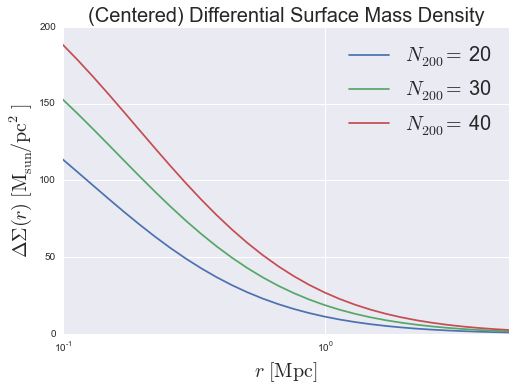

In [15]:
for rich, profile in zip(c.n200,c.deltasigma_nfw):
    plt.plot(rbins, profile, label='$N_{200}=$ '+str(rich))
plt.xscale('log')
plt.legend(fontsize=20)

plt.xlim(rbins.min(), rbins.max())
plt.xlabel('$r\ [\mathrm{Mpc}]$', fontsize=20)
plt.ylabel('$\Delta\Sigma(r)\ [\mathrm{M}_\mathrm{sun}/\mathrm{pc}^2]$', fontsize=20)
plt.title('(Centered) Differential Surface Mass Density', fontsize=20)

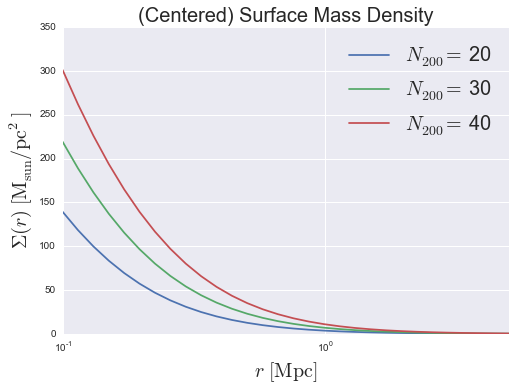

In [16]:
for rich, profile in zip(c.n200,c.sigma_nfw):
    plt.plot(rbins, profile, label='$N_{200}=$ '+str(rich))
plt.xscale('log')
plt.legend(fontsize=20)

plt.xlim(rbins.min(), rbins.max())
plt.xlabel('$r\ [\mathrm{Mpc}]$', fontsize=20)
plt.ylabel('$\Sigma(r)\ [\mathrm{M}_\mathrm{sun}/\mathrm{pc}^2]$', fontsize=20)
plt.title('(Centered) Surface Mass Density', fontsize=20)

# Calculate Miscentered NFW Profiles
First select the offsets in units of Mpc. The offset values parameterize the width of the Gaussian distribution of offsets, and is $\sigma_\mathrm{off}$ in Equation 11 of [Ford et al 2015](http://arxiv.org/abs/1409.3571).

In [17]:
offsets = np.array([0.1,0.1,0.1])
c.calc_nfw(rbins, offsets=offsets)

In [18]:
#c.deltasigma_offset
#c.sigma_offset

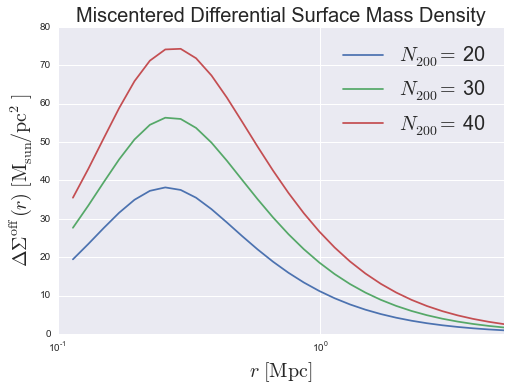

In [19]:
for rich, profile in zip(c.n200,c.deltasigma_offset):
    plt.plot(rbins, profile, label='$N_{200}=$ '+str(rich))
plt.xscale('log')
plt.legend(fontsize=20)

plt.xlim(rbins.min(), rbins.max())
plt.xlabel('$r\ [\mathrm{Mpc}]$', fontsize=20)
plt.ylabel('$\Delta\Sigma^\mathrm{off}(r)\ [\mathrm{M}_\mathrm{sun}/\mathrm{pc}^2]$', 
           fontsize=20)
plt.title('Miscentered Differential Surface Mass Density', fontsize=20)

### To Do: 
- fix bug giving Inf in first bin of smoothed profiles
- write tests for calc_nfw() and replace smd_nfw.c with cython version
- write more tests
- use decorators (@property, @setter, @deleter) instead of update_z(), for example
- option to pass in a $M_{prelim}$ and $M_{200} = a \times$ $M_{prelim}$ relation